## 【問題1】仮定関数
クラスの外から呼び出すことがないメソッドのため、
Pythonの慣例としてアンダースコアを先頭にひとつつけています。

In [1]:
import pandas as pd
def _linear_hypothesis(self, theta):  # 必要に応じて引数を追加して下さい
    """
    線形の仮定関数を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    self.coef_ : theta(coefficient) 次の形のndarray, shape (n_features,)
      パラメータ
    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果
    """
    # X.shape(n_samples, n_features) shape[0]で行数取得,shape[1]で列数取得
    n_samples = X.shape[0]
    n_features = X.shape[1]
    # Xの(n_samples, 1) のshapeの1のみの行列を作る
    one_array = np.ones((n_samples, 1))
    # Xの一列目にone_arrayを結合
    one_X = np.concatenate([one_array, X], axis=1)
    # one_Xの特徴量数の1のみの行列を作る(n_features+1, 1) shape[1]で列数取得
    theta = np.ones((one_X.shape[1], 1))

    y_hat = one_X @ theta

    return y_hat, theta

## 【問題2】最急降下法
以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、
fitメソッドから呼び出すようにしてください。

In [2]:
def _gradient_descent(self):
    # _gradient_descent(self, X, y_hat, y_true, alpha= , one_X, n_samples):
    """
    最急降下法によるパラメータの更新値計算
    Parameters
    ----------
    α: 学習率
    i : サンプルのインデックス
    j : 特徴量のインデックス
    lr : alfa アルファ　学習率(learning rate)
    self.coef_ : theta(coefficient) 次の形のndarray, shape (n_features,)
    Returns
    -------
    theta
    """
    # y_hatは　_linear_hypothesisのreturnを予定　
    # y_trueはどこかの正解値
    # alphaはスカラー
    error = y_hat - y_true
    # one_Xは　Xの1列目に1のみの列を結合させてある
    theta = theta - (alfa / n_samples) * (error.T @ one_X).T

    return theta

## 【問題3】推定
推定する仕組みを実装してください。

## 【問題4】平均二乗誤差
別の関数として作成してください。雛形を用意してあります。

## 【問題5】目的関数

## 【問題6】学習と推定

## 【問題7】学習曲線のプロット

In [3]:
import numpy as np
# import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [73]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter, lr, no_bias=True, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.losses = np.array([])
        self.losses_val = np.array([])
        self.theta = None

    # 問題6（学習と推定）
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        """
        # self.n_samples = X.shape[0]
        # n_features = X.shape[1]

        self.theta = np.ones((X.shape[1]+1, 1)) # 1の配列でthetaを作成。shape(X.shape[1]+1, 1)
        one_array = np.ones((X.shape[0], 1)) # bias項サンプル数分作成
        one_X = np.concatenate([one_array, X], axis=1) # Xとbias項を結合


        one_X_val = None # これがないと　# 「損失計算と記録内」のone_X_valが定義されてないかもとの警告がでる。


        if X_val is not None:
            one_array = np.ones((X_val.shape[0], 1)) # bias項サンプル数分作成
            one_X_val = np.concatenate([one_array, X_val], axis=1) # Xとbias項を結合


        for i in range(self.iter):

            # 問題1（仮定関数の計算）
            # self._linear_hypothesis(x)の中身を書き出し
            # self.prediction = one_X @ self.theta
            prediction = one_X @ self.theta # losses_val


            # 問題2（最急降下法によるパラメータの更新値計算）
            # self._gradient_descent(a)の中身を書き出し
            # error = self.prediction - y # yはy_train
            error = prediction - y # yはy_train
            self.theta = self.theta - (self.lr / X.shape[0]) * (error.T @ one_X).T


            # 損失計算と記録
            prediction = one_X @ self.theta
            loss = self._loss_func(y,prediction)
            self.losses = np.append(self.losses, loss)


            if X_val is not None:
                # print(one_X_val.shape)
                # print(self.theta.shape)
                prediction_val = one_X_val @ self.theta
                loss_val = self._loss_func(y_val,prediction_val)
                self.losses_val = np.append(self.losses_val, loss_val)


            # 問題7（学習曲線のプロット）のグラフ描画時（問題5（損失関数）で作成した関数を使用）
            # self._mse(y)
            # self._loss_func()

    # 問題1
    def _linear_hypothesis(self, X):  # 必要に応じて引数を追加して下さい
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        self.coef_ : theta(coefficient) 次の形のndarray, shape (n_features,)
          パラメータ
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        # X.shape(n_samples, n_features) shape[0]で行数取得,shape[1]で列数取得
        self.n_samples = X.shape[0]
        n_features = X.shape[1]


        # Xの(n_samples, 1) のshapeの1のみの行列を作る
        one_array = np.ones((X.shape[0], 1))

        # Xの一列目にone_arrayを結合
        self.one_X = np.concatenate([one_array, X], axis=1)

        # one_Xの特徴量数の1のみの行列を作る(n_features+1, 1) shape[1]で列数取得
        self.prediction = self.one_X @ self.theta


    # 問題2
    def _gradient_descent(self, X, y):
        # _gradient_descent(self, X, y_hat, y_true, alpha= , one_X, n_samples):
        """
        最急降下法によるパラメータの更新値計算
        Parameters
        ----------
        α: 学習率
        i : サンプルのインデックス
        j : 特徴量のインデックス
        lr : alfa アルファ　学習率(learning rate)
        self.coef_ : theta(coefficient) 次の形のndarray, shape (n_features,)
        Returns
        -------
        theta
        """
        # y_hatは　_linear_hypothesisのreturnを予定　
        # y_trueはどこかの正解値
        error = self.prediction - y

        # one_Xは　Xの1列目に1のみの列を結合させてある
        self.theta = self.theta - (self.lr / self.n_samples) * (error.T @ self.one_X).T

    # 問題3
    def predict(self, X):
        """
        線形回帰での推定
        """
        #  パラメータを決定した後、そのパラメータを用いて、予測結果を出力しなければなりません。これを推定と言います。
        one_array = np.ones((X.shape[0], 1))
        one_X = np.concatenate([one_array, X], axis=1)
        self.prediction = one_X @ self.theta

        # return prediction

    # 問題4
    def _mse(self, y, prediction):
        """
        平均二乗誤差の計算
        """
        mse = ((prediction - y)**2).mean(axis=0)

        return mse

    # 問題5
    def _loss_func(self, y, prediction):
        """
        損失関数
        """
        # 引数のイメージ
        # y=1
        # prediction=2


        # loss = self.mse / 2
        # self.losses = np.append(self.losses, loss)
        mse = self._mse(y, prediction)
        loss = mse / 2

        return loss

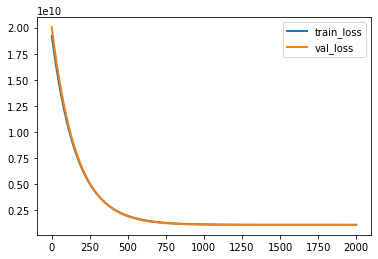

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# pd.read_csv()を使用して、変数に格納
train = pd.read_csv('train.csv')

# Xに説明変数GrLivArea(リビングの広さ)とYearBuiltを抽出
X_df = train[["GrLivArea", "YearBuilt"]]

# Yに目的変数SalePriceを抽出
Y_df = train[["SalePrice"]]

# X_df, Y_dfをconcatメソッドで　axis=1に結合
df = pd.concat([X_df, Y_df], axis=1)

# DataFrameをndarrayへ変換
X_ndarray = X_df.values
Y_ndarray = Y_df.values

# 前処理の一貫として、訓練データと検証データの分割。今回は訓練データ75%、検証データ25%として分割。
X_train, X_test, Y_train, Y_test = train_test_split(X_ndarray, Y_ndarray, test_size=0.25)


scl = StandardScaler()

# 標準化（訓練用データで.fitを行う）
# fit:パラメータ（平均や標準偏差 etc）計算
# fit_transform:パラメータ計算とデータ変換をまとめて実行
scl.fit(X_train)

# 標準化（訓練用、検証用双方で.transformを行う）
# transform:データ変換
X_train_transformed = scl.transform(X_train)
X_test_transformed = scl.transform(X_test)

#-------------------------------　スクラッチ　------------------------------------------------
num_iter=2000
lr=0.003
slr = ScratchLinearRegression(num_iter, lr, no_bias=True, verbose=False)

slr.fit(X_train_transformed, Y_train, X_test_transformed, Y_test)
Y_test_pred_0 = slr.predict(X_test_transformed)

# print(len(slr.losses))
# print(len(slr.losses_val))


#-------------------------------　sklearn.linear_model　　------------------------------------------------
# from sklearn.linear_model import LinearRegression
#
# # モデルに引数を渡してインスタン化する
# lgr = LinearRegression()
# #
# # # 学習する（訓練用データを.fitする）
# lgr.fit(X_train_transformed, Y_train, X_test_transformed, Y_test)
# #
# # # # 推定する（検証用データを.predictする）
# # Y_train_pred = lgr.predict(X_train_transformed)
# Y_test_pred_1 = lgr.predict(X_test_transformed)


#-------------------------------　描画　------------------------------------------------
plt.plot(np.arange(1,len(slr.losses)+1),slr.losses,label='train_loss',linewidth=2)
plt.plot(np.arange(1,len(slr.losses_val)+1),slr.losses_val,label='val_loss',linewidth=2)
plt.legend()